<a href="https://colab.research.google.com/github/sergiolopezzl/DIMD/blob/main/Tarea_Employee_Grupo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Las tareas

1. Renombrar el archivo y poner un numero de grupo unico (acordar con sus companieros de claee)
2. Escribir un listado de sub problemas
3. Escribir un listado exhaustiva de las preguntas descriptivas y explorativas
4. Preprocesar los datos y escribir el detalle del proceso (datos faltantes, duplicados, etc.)
5. Crear datos numericos con los datos cualitativos (categoricos)
6. Crear las respuestas en forma de graficas con las distribuciones, datos cruzados
7. Crear las visualizaciones con la indicacion de las tendencias y patrones en la grafica
8. Crear modelos predictivos
8. Crear un archivo de MS Word y escribir un reporte de los resultados encontrados
9. Poner todos los archivos en una carpeta, comprimirlo (.zip) y subir la a la carpeta de entregas con el nombre TareaEmployeeGrupoX.zip  

# Nombres de los participantes (grupos de 3 personas maximo):
1. SERGIO DANIEL LOPEZ VARGAS


# Problema de Promoción

¿Predecir si el empleado de una organización debería obtener un ascenso o no?

* a. ¿Cuántos empleados hay en total?
* b. ¿Cuál es la distribución de empleados por departamento?
* c. ¿Cómo se distribuyen los empleados por región?
* d. ¿Cuál es el nivel educativo predominante entre los empleados?
* e. ¿Cuál es la proporción de género en la organización?
* f. ¿Cuál es el canal de reclutamiento más utilizado?
* g. ¿Cuál es la edad promedio de los empleados?
* h. ¿Cuál es la calificación promedio del año anterior de los empleados?
* i. ¿Cuál es la duración promedio del servicio de los empleados?
* j. ¿Cuántos empleados han ganado premios?
* k. ¿Cuál es el puntaje promedio de entrenamiento?
* l. ¿Cuál es la proporción de empleados promovidos y no promovidos?

Identificar a las personas adecuadas para la promoción (solo para puestos directivos e inferiores) y prepararlas a tiempo.

Los ascensos finales sólo se anuncian después de la evaluación y esto provoca retrasos en la transición a nuevos roles. Por lo tanto, la empresa necesita ayuda para identificar a los candidatos elegibles en un punto de control particular para poder acelerar todo el ciclo de promoción.

* Primero identifican un conjunto de empleados en función de recomendaciones/desempeño pasado.
* Los empleados seleccionados pasan por el programa de capacitación y evaluación por separado para cada vertical. Estos programas se basan en la habilidad requerida de cada vertical.
* Al final del programa, en función de varios factores, como el desempeño en la capacitación, un empleado obtiene el ascenso.



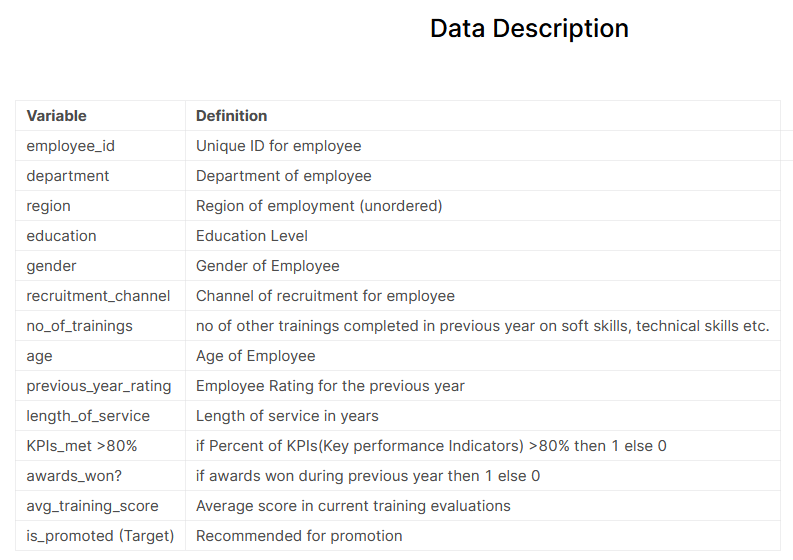

In [ ]:
!gdown 1Xtkl7rvD-0oH_Dr4M7v1S7FEz81OOlc0

Downloading...
From: https://drive.google.com/uc?id=1Xtkl7rvD-0oH_Dr4M7v1S7FEz81OOlc0
To: /content/train.csv
100% 3.70M/3.70M [00:00<00:00, 47.6MB/s]


In [ ]:
# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [ ]:
missing_values=train_df.isnull()
train_df.nunique()
train_df[["department"]].value_counts()

department       
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
dtype: int64

El número total de empleados es: 54808


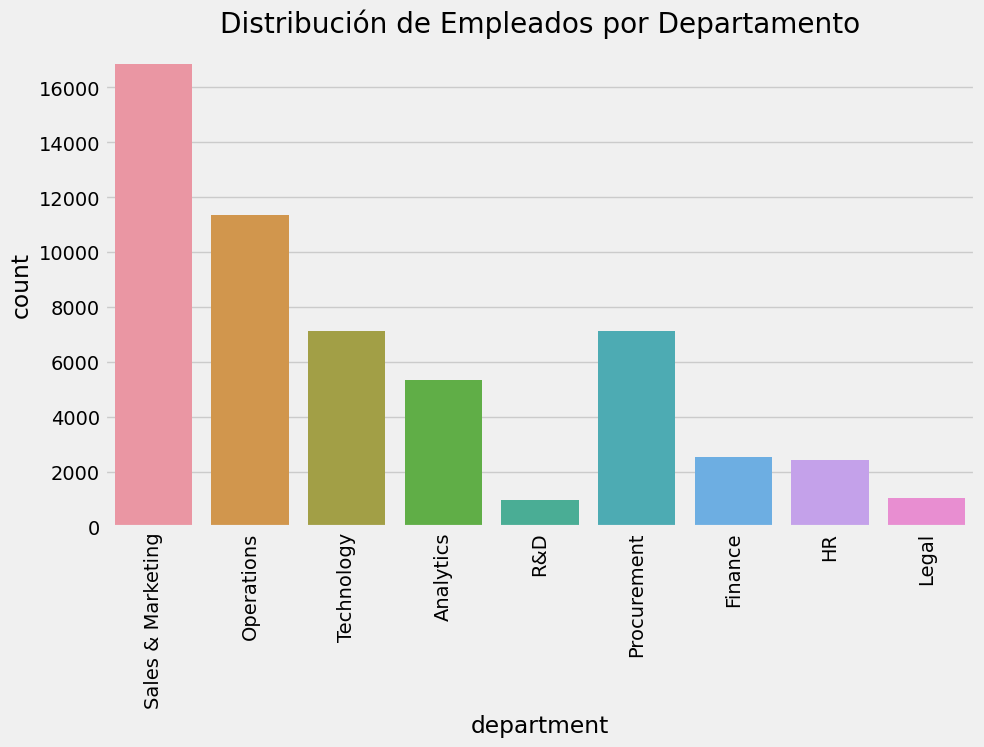

In [ ]:
# a. ¿Cuántos empleados hay en total? / # b. ¿Cuál es la distribución de empleados por departamento?
plt.rcParams['figure.figsize'] = (10, 6)

# Calcular el número total de empleados
total_empleados = len(train_df)

# Mostrar el número total de empleados
print(f'El número total de empleados es: {total_empleados}')

# Crear un gráfico para la distribución de empleados por departamento
sns.countplot(data=train_df, x='department')
plt.title('Distribución de Empleados por Departamento')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.show()


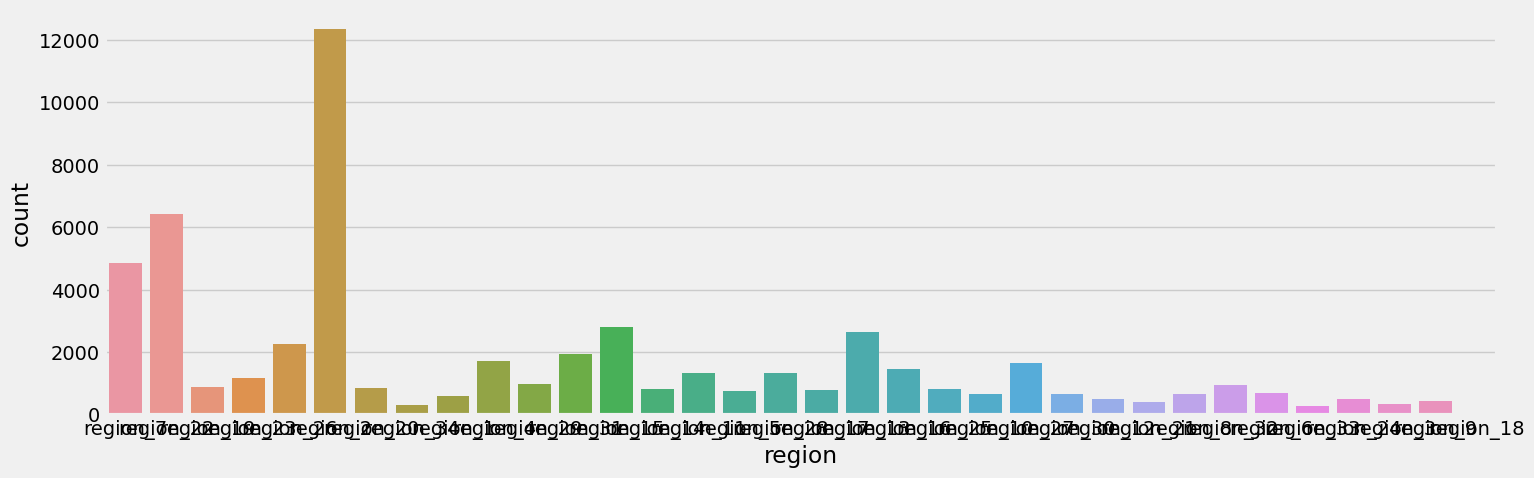

In [ ]:
# c. ¿Cómo se distribuyen los empleados por región?
sns.countplot(data=train_df, x='region');

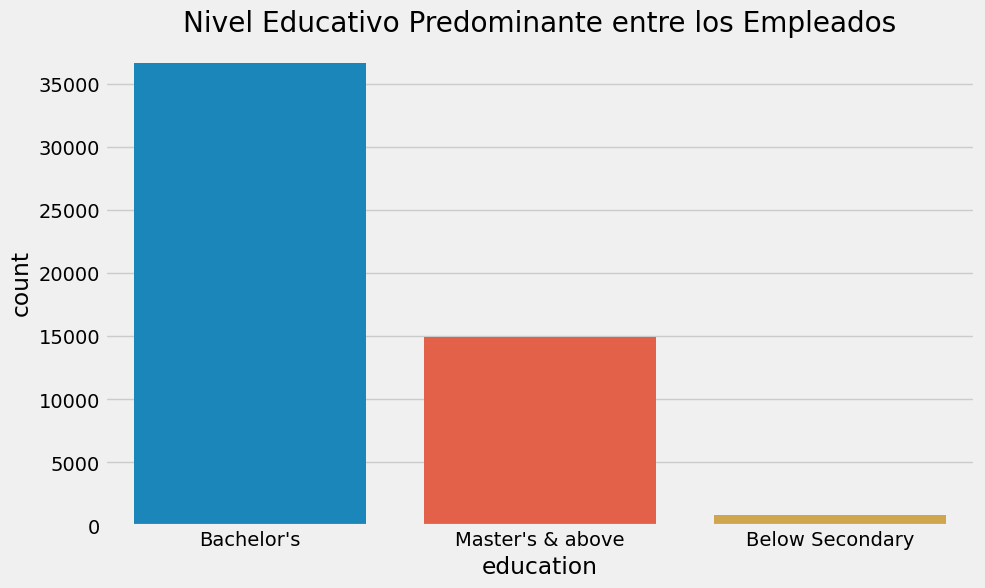

In [ ]:
# d. ¿Cuál es el nivel educativo predominante entre los empleados?
plt.rcParams['figure.figsize'] = (10, 6)

# Crear un gráfico de barras para el nivel educativo predominante
sns.countplot(data=train_df, x='education', order=train_df['education'].value_counts().index)
plt.title('Nivel Educativo Predominante entre los Empleados')

# Mostrar el gráfico
plt.show()

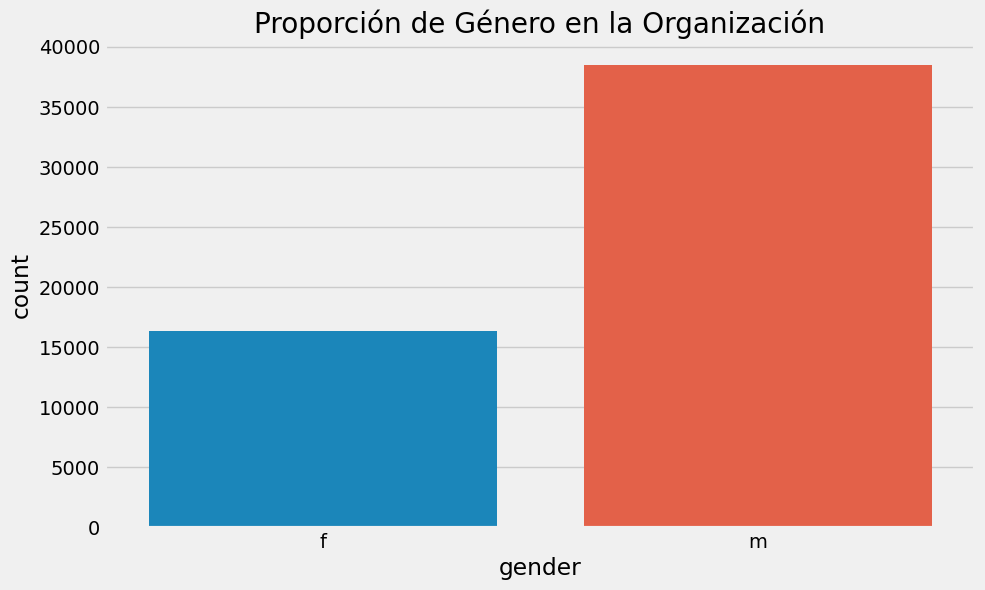

In [ ]:
#e. ¿Cuál es la proporción de género en la organización?
plt.rcParams['figure.figsize'] = (10, 6)

# Crear un gráfico de barras para la proporción de género
sns.countplot(data=train_df, x='gender')
plt.title('Proporción de Género en la Organización')

# Mostrar el gráfico
plt.show()


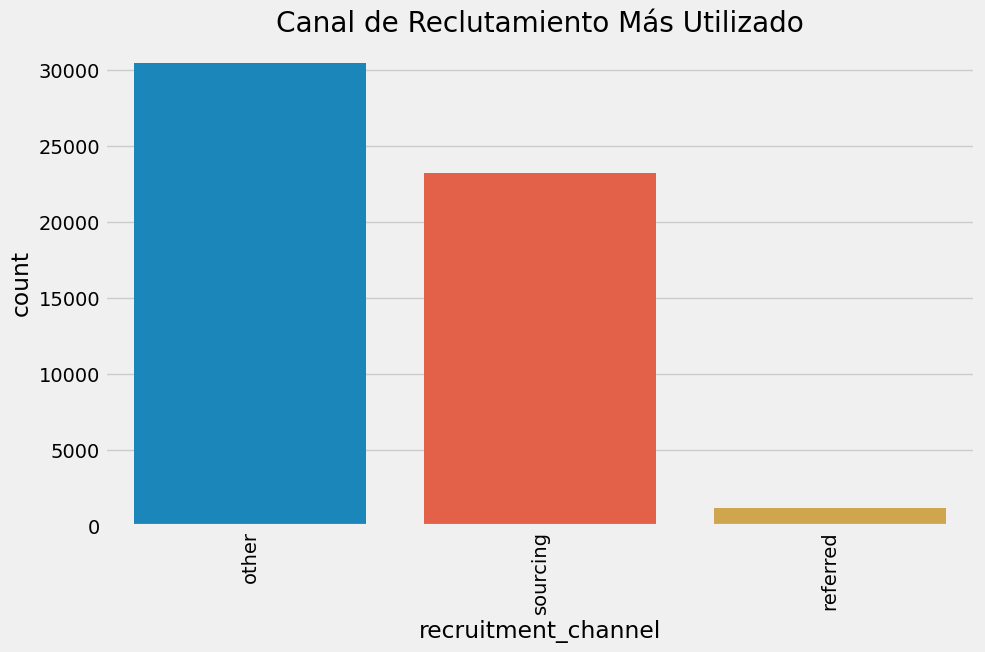

In [ ]:

# f. ¿Cuál es el canal de reclutamiento más utilizado?
# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)

# Crear un gráfico de barras para el canal de reclutamiento más utilizado
sns.countplot(data=train_df, x='recruitment_channel', order=train_df['recruitment_channel'].value_counts().index)
plt.title('Canal de Reclutamiento Más Utilizado')

# Rotar etiquetas del eje x para mayor claridad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

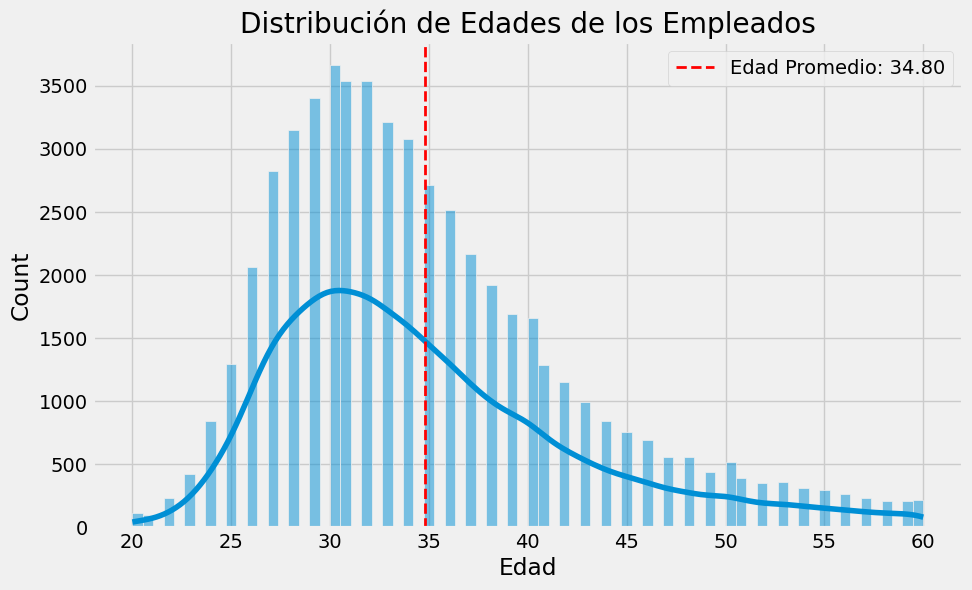

In [ ]:

# g. ¿Cuál es la edad promedio de los empleados?
# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)

# Calcular la edad promedio de los empleados
average_age = train_df['age'].mean()

# Crear un histograma de la distribución de edades
sns.histplot(data=train_df, x='age', kde=True)
plt.title('Distribución de Edades de los Empleados')
plt.xlabel('Edad')

# Mostrar la edad promedio en el gráfico
plt.axvline(x=average_age, color='red', linestyle='dashed', linewidth=2, label=f'Edad Promedio: {average_age:.2f}')
plt.legend()

# Mostrar el gráfico
plt.show()

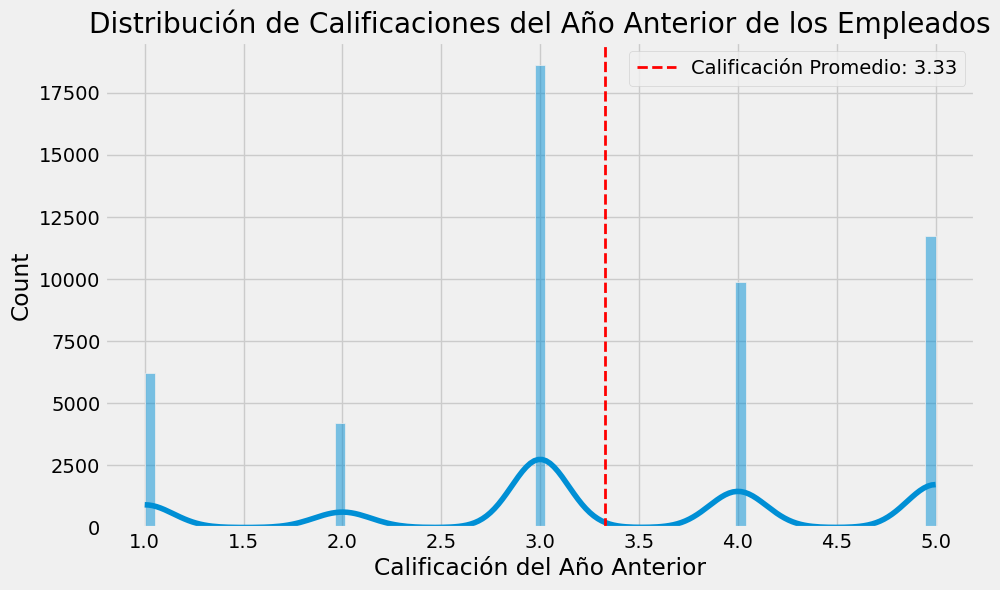

In [ ]:

# h. ¿Cuál es la calificación promedio del año anterior de los empleados?
# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)

# Calcular la calificación promedio del año anterior
average_rating = train_df['previous_year_rating'].mean()

# Crear un histograma de la distribución de calificaciones del año anterior
sns.histplot(data=train_df, x='previous_year_rating', kde=True)
plt.title('Distribución de Calificaciones del Año Anterior de los Empleados')
plt.xlabel('Calificación del Año Anterior')

# Mostrar la calificación promedio en el gráfico
plt.axvline(x=average_rating, color='red', linestyle='dashed', linewidth=2, label=f'Calificación Promedio: {average_rating:.2f}')
plt.legend()

# Mostrar el gráfico
plt.show()

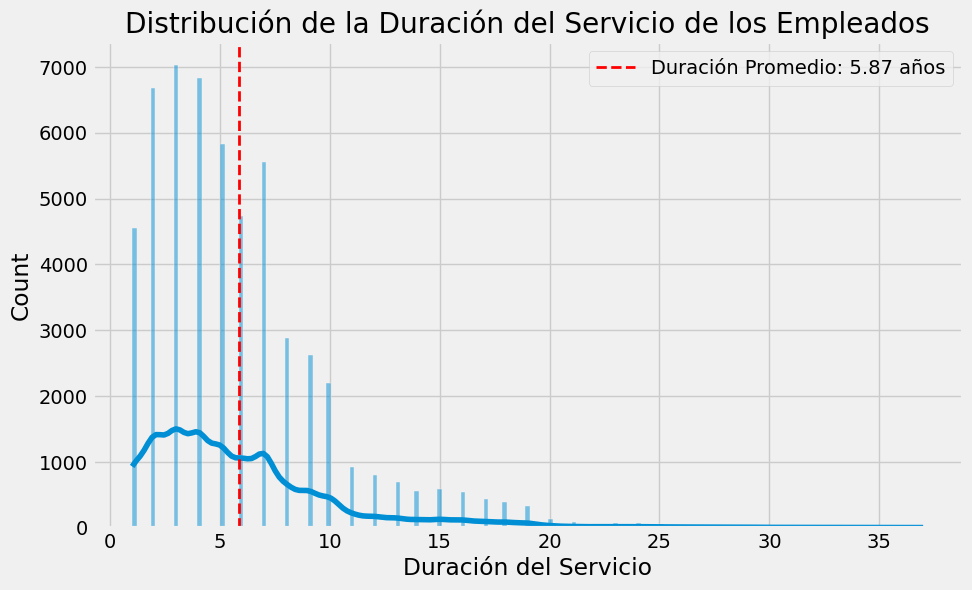

In [ ]:

# i. ¿Cuál es la duración promedio del servicio de los empleados?
# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)

# Calcular la duración promedio del servicio
average_service_duration = train_df['length_of_service'].mean()

# Crear un histograma de la distribución de la duración del servicio
sns.histplot(data=train_df, x='length_of_service', kde=True)
plt.title('Distribución de la Duración del Servicio de los Empleados')
plt.xlabel('Duración del Servicio')

# Mostrar la duración promedio en el gráfico
plt.axvline(x=average_service_duration, color='red', linestyle='dashed', linewidth=2, label=f'Duración Promedio: {average_service_duration:.2f} años')
plt.legend()

# Mostrar el gráfico
plt.show()

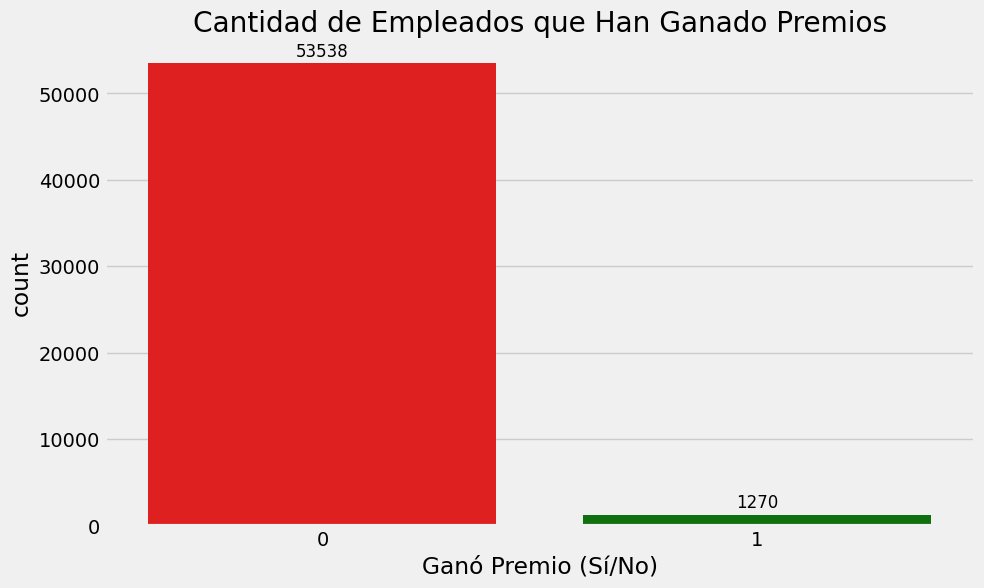

In [ ]:

# j. ¿Cuántos empleados han ganado premios?
# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)

# Contar cuántos empleados han ganado premios (columna 'awards_won?')
awards_count = train_df['awards_won?'].sum()

# Crear un gráfico de barras para mostrar la cantidad de empleados que han ganado premios
sns.countplot(data=train_df, x='awards_won?', palette=['red', 'green'])
plt.title('Cantidad de Empleados que Han Ganado Premios')
plt.xlabel('Ganó Premio (Sí/No)')

# Anotar el número de empleados que ganaron premios en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Mostrar el gráfico
plt.show()

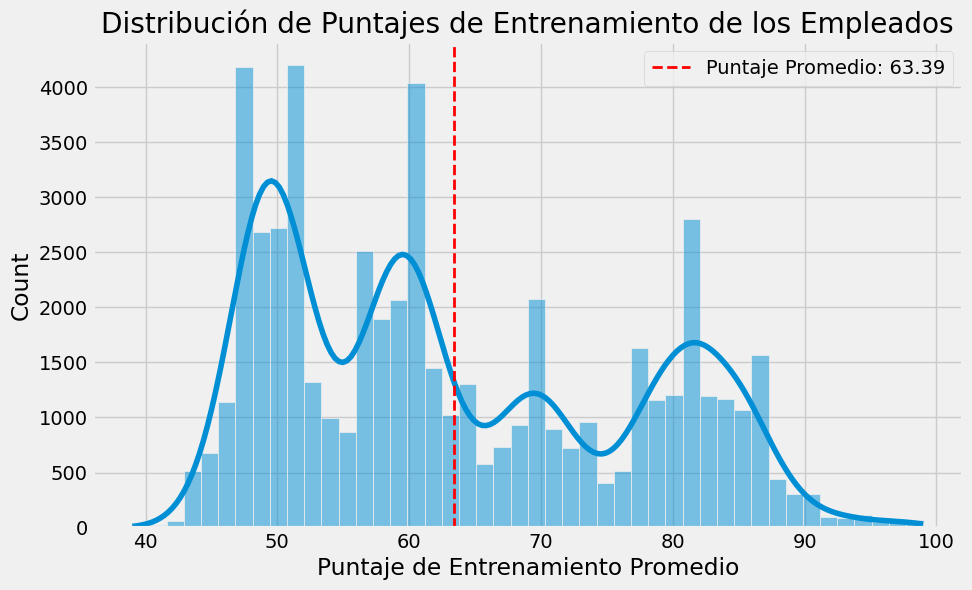

In [ ]:

# k. ¿Cuál es el puntaje promedio de entrenamiento?
# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 6)

# Calcular el puntaje promedio de entrenamiento
average_training_score = train_df['avg_training_score'].mean()

# Crear un histograma de la distribución de puntajes de entrenamiento
sns.histplot(data=train_df, x='avg_training_score', kde=True)
plt.title('Distribución de Puntajes de Entrenamiento de los Empleados')
plt.xlabel('Puntaje de Entrenamiento Promedio')

# Mostrar el puntaje promedio en el gráfico
plt.axvline(x=average_training_score, color='red', linestyle='dashed', linewidth=2, label=f'Puntaje Promedio: {average_training_score:.2f}')
plt.legend()

# Mostrar el gráfico
plt.show()


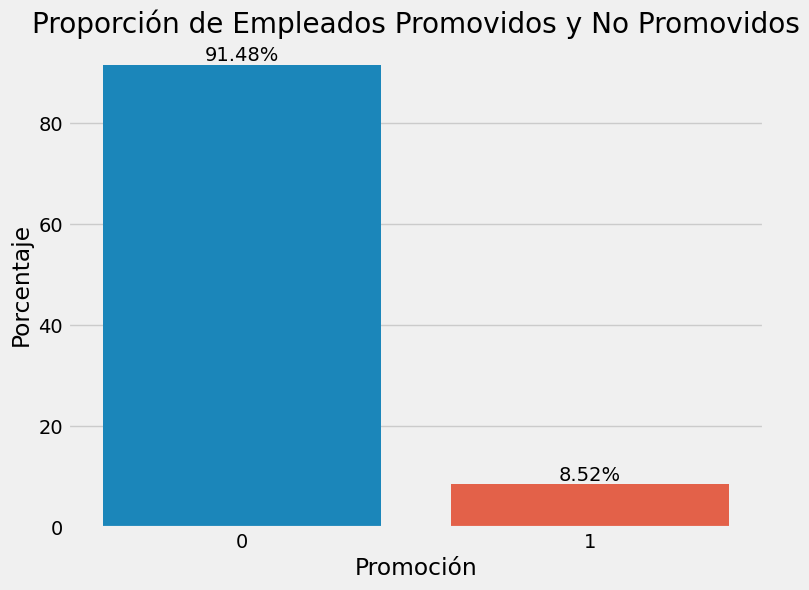

In [ ]:

# l. ¿Cuál es la proporción de empleados promovidos y no promovidos?

plt.rcParams['figure.figsize'] = (8, 6)

# Calcular la proporción de empleados promovidos y no promovidos
promoted_counts = train_df['is_promoted'].value_counts(normalize=True) * 100

# Crear un gráfico de barras de la proporción
sns.barplot(x=promoted_counts.index, y=promoted_counts.values)
plt.title('Proporción de Empleados Promovidos y No Promovidos')
plt.xlabel('Promoción')
plt.ylabel('Porcentaje')

# Mostrar el porcentaje en las barras
for index, value in enumerate(promoted_counts.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

<ipython-input-68-4021957a1a3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.drop('employee_id',axis=1).corr(), vmax=0.4, square=True, annot=True)


<Axes: >

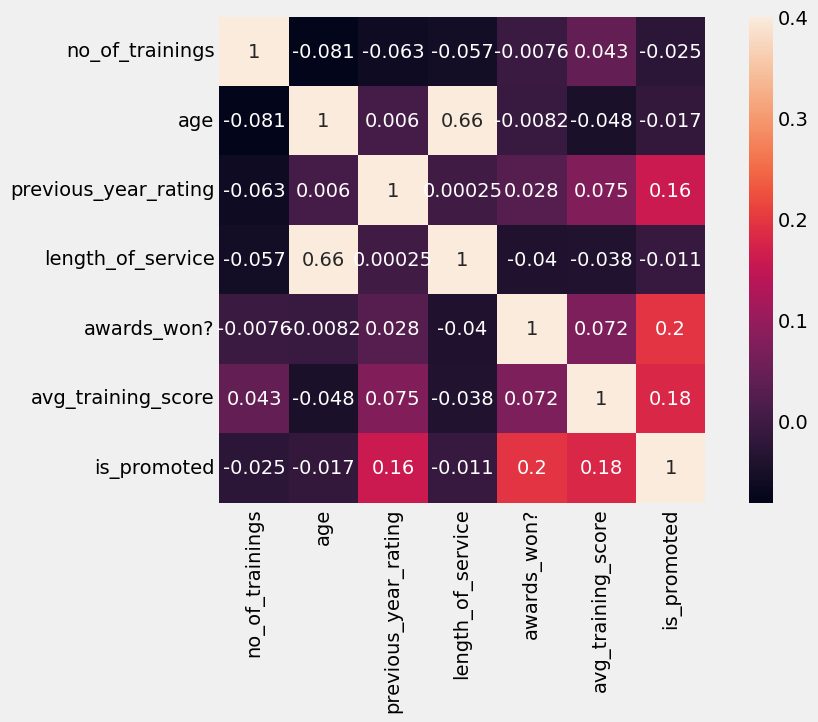

In [ ]:
# matriz de correlación entre las variables en el DataFrame para posibles patrones en los datos.
sns.heatmap(train_df.drop('employee_id',axis=1).corr(), vmax=0.4, square=True, annot=True)